# Lecture 16 Clustering

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Clustering with Synthetic Data

In [37]:
# generate synthetic data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

In [38]:
X.shape

(750, 2)

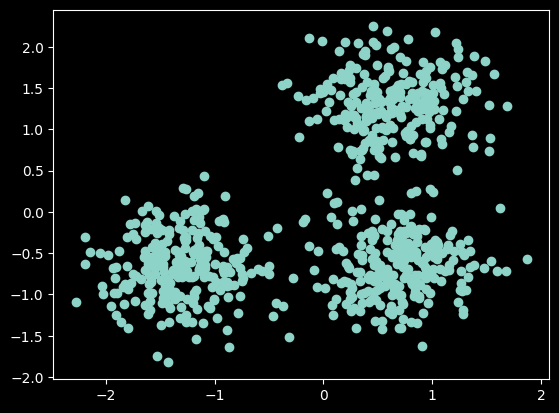

In [39]:
# plot synthetic data
x_values = X[:, 0]
y_values = X[:, 1]

plt.scatter(x_values, y_values)


In [40]:
# run k-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)


KMeans(n_clusters=3)

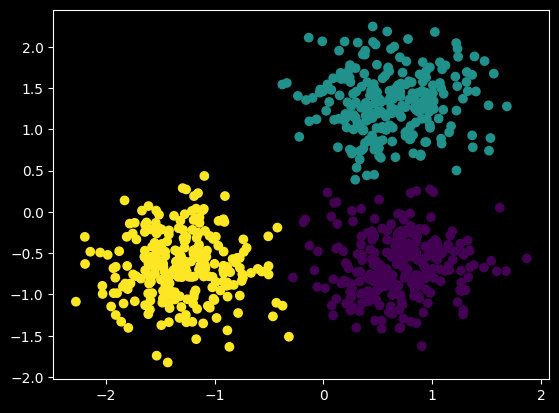

In [41]:
# plot k-means results
plt.scatter(x_values, y_values, c=kmeans.labels_)

In [42]:
# run DBSCAN
dbscan = DBSCAN(eps=.3, min_samples=10)
dbscan.fit(X)

dbscan.labels_[:50]

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1])

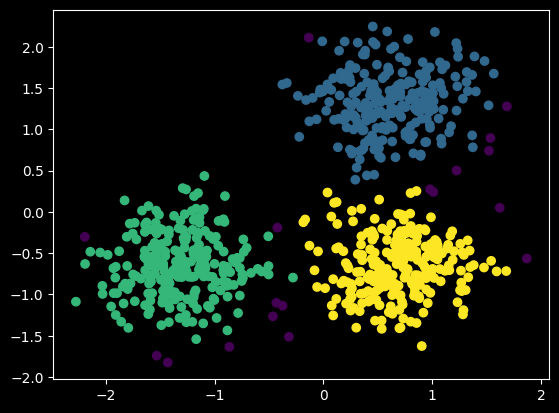

In [43]:
# plot DBSCAN results
plt.scatter(x_values, y_values, c=dbscan.labels_)


In [44]:
# run agglomerative clustering
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

agg.labels_[:50]

array([2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 0,
       0, 0, 2, 1, 2, 0])

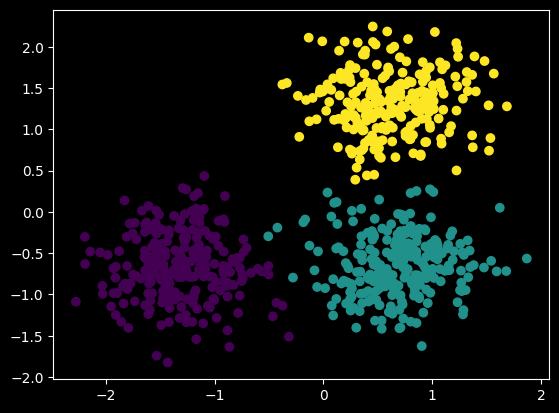

In [45]:
# plot agglomerative clustering results
plt.scatter(x_values, y_values, c=agg.labels_)

### Now let's cluster the E. coli protein location data

In [46]:
# load data
ecoli_df = pd.read_csv('data/ecoli_data.csv')

ecoli_df.head()

,sequence,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [35]:
# inspect class values
ecoli_df['class'].value_counts()

class
cp     143
im      77
pp      52
imU     35
om      20
omL      5
imS      2
imL      2
Name: count, dtype: int64

In [48]:
# use factorize to convert the class labels to integers
ecoli_df['class'], class_names = pd.factorize(ecoli_df['class'])

ecoli_df['class'].value_counts()

class
0    143
1     77
7     52
4     35
5     20
6      5
2      2
3      2
Name: count, dtype: int64

In [50]:
# create feature_df by removing class and sequence columns
feature_df = ecoli_df.drop(['class', 'sequence'], axis=1)

feature_df

,mcg,gvh,lip,chg,aac,alm1,alm2
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35
...,...,...,...,...,...,...,...
331,0.74,0.56,0.48,0.5,0.47,0.68,0.30
332,0.71,0.57,0.48,0.5,0.48,0.35,0.32
333,0.61,0.60,0.48,0.5,0.44,0.39,0.38
334,0.59,0.61,0.48,0.5,0.42,0.42,0.37


In [51]:
# use standard scaler to preprocess the data
scaler = StandardScaler()
scaled_feature_df = scaler.fit_transform(feature_df)

scaled_feature_df

array([[-0.0517614 , -1.41953086, -0.17514236, ...,  0.49078096,
        -1.20771743, -0.7160837 ],
       [-2.21287637, -0.67596708, -0.17514236, ...,  0.32710612,
        -0.69711074, -0.28566488],
       [ 0.30842443, -0.67596708, -0.17514236, ..., -0.08208098,
        -0.60427317, -0.19001625],
       ...,
       [ 0.56570002,  0.67596708, -0.17514236, ..., -0.49126808,
        -0.51143559, -0.57261076],
       [ 0.46278978,  0.74356378, -0.17514236, ..., -0.65494292,
        -0.37217922, -0.62043507],
       [ 1.23461656,  1.62232098, -0.17514236, ..., -1.55515454,
         0.13842746,  0.09692964]])

In [52]:
# visualize the data in two dimensions
pca = PCA(n_components=2)
features_pca = pca.fit_transform(scaled_feature_df)

features_pca

array([[-1.29035151e+00, -3.24912472e-01],
       [-1.58601216e+00, -1.03468292e+00],
       [-5.30483123e-01, -1.30495184e-01],
       [-2.61720798e-01,  3.38264075e-01],
       [-1.82436437e+00, -7.31834460e-01],
       [-6.40359260e-01,  9.14984789e-02],
       [-2.14346042e+00, -6.66199646e-01],
       [-1.76945641e+00, -7.93057269e-01],
       [-6.93270938e-01, -1.00629762e+00],
       [-1.57120123e+00,  3.51996438e-02],
       [-1.36023410e+00, -6.84405890e-01],
       [-2.22120086e+00,  3.75520260e-02],
       [-1.75082107e+00, -3.82457321e-01],
       [-9.85480780e-01,  3.58866415e-01],
       [-2.30316491e+00, -1.67055951e-01],
       [-9.62038422e-01, -8.85316631e-01],
       [-1.89186232e+00, -3.39888583e-02],
       [-1.08494954e-01, -1.14888887e+00],
       [-1.99821878e+00, -4.97585720e-01],
       [-1.68384927e+00,  5.60048731e-01],
       [-2.67100999e+00,  7.88527376e-01],
       [-2.35030982e+00, -3.66607105e-01],
       [-8.14334188e-01,  3.31973563e-01],
       [-2.

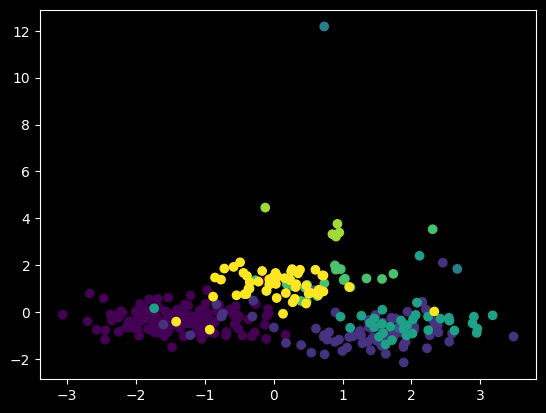

In [54]:
# plot the clusters using the true class labels
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=ecoli_df['class'])

In [58]:
# run k-means
kmeans = KMeans(n_clusters=8, random_state=42)

kmeans_clusters = kmeans.fit_predict(scaled_feature_df)

kmeans_clusters[:50]

array([4, 4, 0, 0, 4, 0, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4,
       0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 0, 0, 2, 0, 4, 4, 4, 0, 4,
       0, 4, 6, 0, 4, 4], dtype=int32)

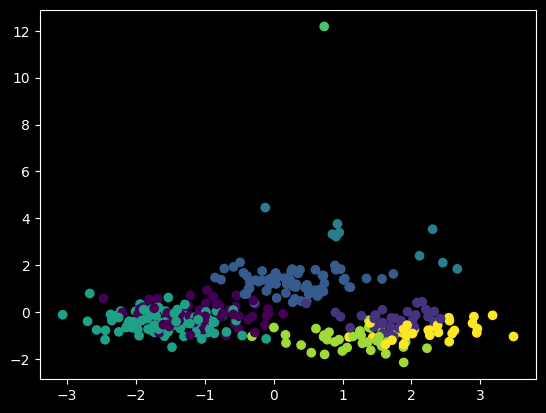

In [59]:
# plot the clusters using the k-means clusters
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=kmeans_clusters)

In [82]:
# try DBSCAN
dbscan = DBSCAN(eps=.9, min_samples=10)

dbscan_clusters = dbscan.fit_predict(scaled_feature_df)

dbscan_clusters[:50]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

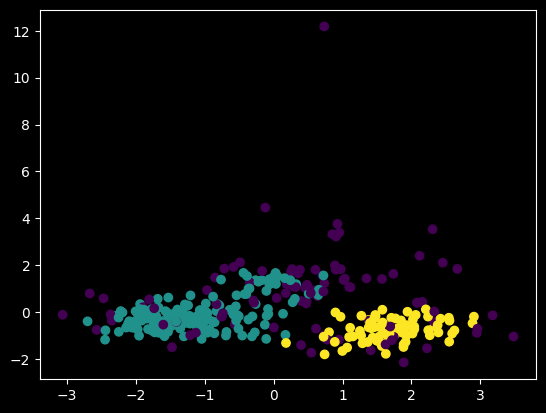

In [83]:
# plot the clusters using the DBSCAN clusters
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=dbscan_clusters)

In [84]:
# use agglomerative clustering
agg = AgglomerativeClustering(n_clusters=8)

agg_clusters = agg.fit_predict(scaled_feature_df)

agg_clusters[:50]

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1])

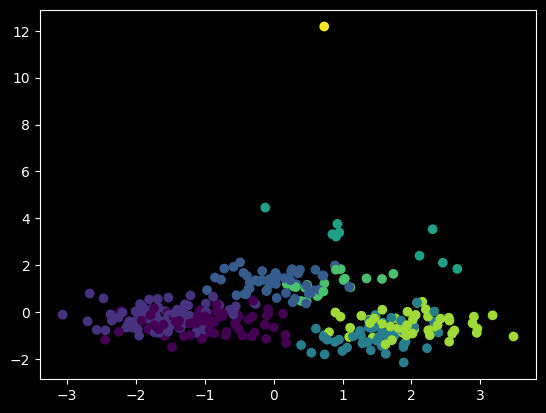

In [85]:
# plot agglomerative clustering results
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=agg_clusters)

